In [19]:
import os
import glob
import pandas as pd

# Define la ruta a la carpeta donde están los CSVs (puede ser '.' para el directorio actual)
metrics_folder = "."  # Cambia esto según corresponda
csv_files = glob.glob(os.path.join(metrics_folder, "*.csv"))

# Lista de DataFrames
dfs = [pd.read_csv(f) for f in csv_files]

# Combina todos en un único DataFrame
metrics_df = pd.concat(dfs, ignore_index=True)

# Muestra las primeras filas y la forma para comprobar
print("Archivos CSV cargados:", csv_files)
print(metrics_df.head())
print("Total de filas combinadas:", metrics_df.shape[0])

Archivos CSV cargados: ['./ncf_movies_tags_metrics.csv', './neumf_10m_metrics_eval.csv', './neumf_1m_metrics_with_genres.csv', './ncf_movies_metrics.csv', './neumf_1m_metrics.csv', './ncf_simple_100k_metrics.csv']
                       Model  Test RMSE  Test MAE   Test R2  Precision@10  \
0  (Ratings + Genres + Tags)   0.911120  0.717011  0.215100      0.509508   
1              (Ratings-10M)   0.823899  0.638396  0.396985      0.537640   
2        (Ratings_Movies-1M)   0.868973  0.682532  0.395000      0.648659   
3         (Ratings + Genres)   0.915056  0.721267  0.208304      0.504754   
4               (Ratings-1M)   0.868887  0.682980  0.395119      0.647781   

    NDCG@10  Eval Time (s)  Epochs  Train Loss  Val Loss  \
0  0.850452            NaN     NaN         NaN       NaN   
1  0.889932      12.367069     NaN         NaN       NaN   
2  0.931153       1.735862     NaN         NaN       NaN   
3  0.848759            NaN     NaN         NaN       NaN   
4  0.930539            

In [3]:
metrics_df

,Model,Test RMSE,Test MAE,Test R2,Precision@10,NDCG@10,Eval Time (s),Epochs,Train Loss,Val Loss,Total Training Time (s)
0,(Ratings + Genres + Tags),0.911120,0.717011,0.215100,0.509508,0.850452,NaN,NaN,NaN,NaN,NaN
1,(Ratings_Movies-1M),0.868973,0.682532,0.395000,0.648659,0.931153,1.735862,NaN,NaN,NaN,NaN
2,(Ratings + Genres),0.915056,0.721267,0.208304,0.504754,0.848759,NaN,NaN,NaN,NaN,NaN
3,(Ratings-1M),0.868887,0.682980,0.395119,0.647781,0.930539,NaN,7.0,0.023249,0.030894,32.161866
4,(Ratings-100K),0.875805,0.669220,0.297988,0.512459,0.848615,NaN,NaN,NaN,NaN,NaN


In [20]:
summary = metrics_df.groupby("Model").mean().reset_index()
print(summary)

                       Model  Test RMSE  Test MAE   Test R2  Precision@10  \
0  (Ratings + Genres + Tags)   0.911120  0.717011  0.215100      0.509508   
1         (Ratings + Genres)   0.915056  0.721267  0.208304      0.504754   
2             (Ratings-100K)   0.875805  0.669220  0.297988      0.512459   
3              (Ratings-10M)   0.823899  0.638396  0.396985      0.537640   
4               (Ratings-1M)   0.868887  0.682980  0.395119      0.647781   
5        (Ratings_Movies-1M)   0.868973  0.682532  0.395000      0.648659   

    NDCG@10  Eval Time (s)  Epochs  Train Loss  Val Loss  \
0  0.850452            NaN     NaN         NaN       NaN   
1  0.848759            NaN     NaN         NaN       NaN   
2  0.848615            NaN     NaN         NaN       NaN   
3  0.889932      12.367069     NaN         NaN       NaN   
4  0.930539            NaN     7.0    0.023249  0.030894   
5  0.931153       1.735862     NaN         NaN       NaN   

   Total Training Time (s)  
0         

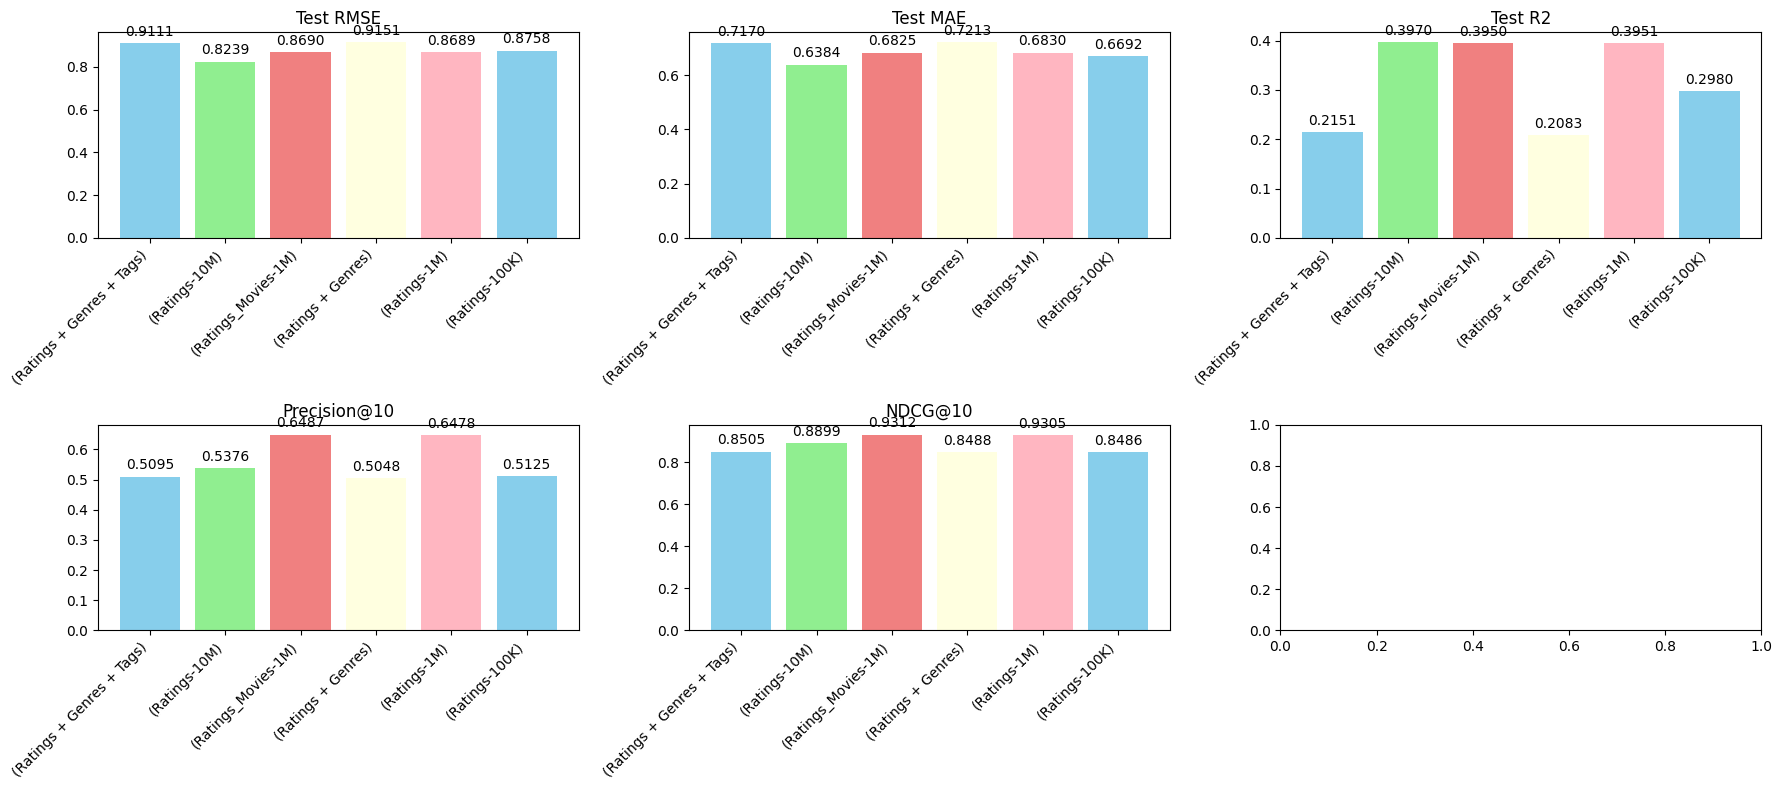

In [21]:
import matplotlib.pyplot as plt

metrics_to_plot = ["Test RMSE", "Test MAE", "Test R2", "Precision@10", "NDCG@10"]

# Aumentar el tamaño de la figura y colocar dos subgráficos por fila
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8))

# Ajustamos el número de columnas y filas de forma correcta
axes = axes.flatten()

# Colores adicionales
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']

for ax, metric, color in zip(axes, metrics_to_plot, colors):
    # Crear las barras y asignar un color diferente para cada grupo
    bars = ax.bar(metrics_df["Model"], metrics_df[metric], color=colors[:len(metrics_df["Model"])])
    
    ax.set_title(metric)
    # Establecer los ticks de X de forma explícita
    ax.set_xticks(range(len(metrics_df["Model"])))
    ax.set_xticklabels(metrics_df["Model"], rotation=45, ha='right')
    
    # Anotar cada barra con su valor
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Desplazamiento vertical de 3 puntos
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

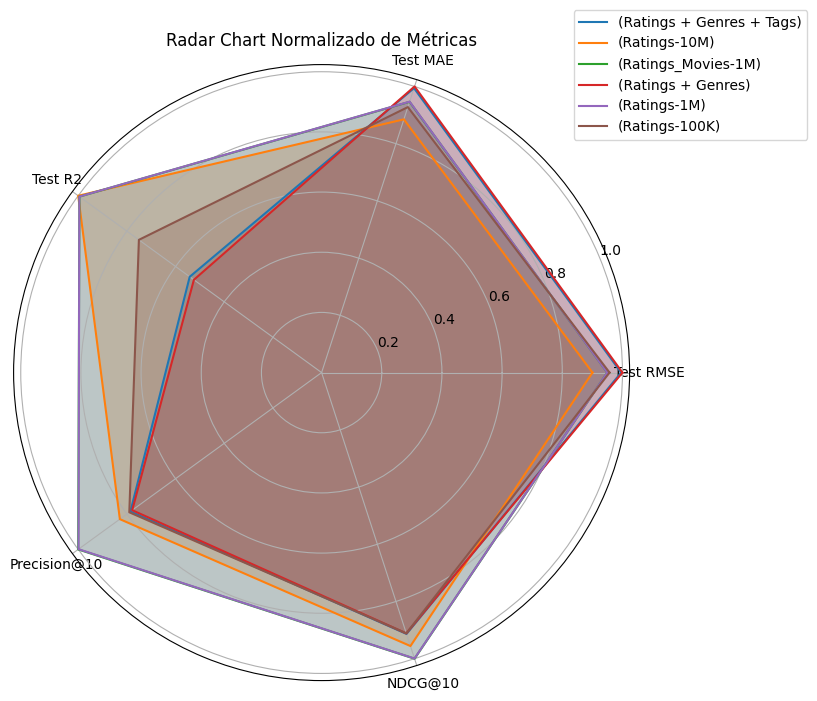

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Métricas que queremos incluir en el radar
metrics_to_radar = ["Test RMSE", "Test MAE", "Test R2", "Precision@10", "NDCG@10"]

# Normalizamos cada métrica al valor máximo entre los modelos
norm_df = metrics_df.copy()
for col in metrics_to_radar:
    max_val = norm_df[col].max()
    norm_df[col] = norm_df[col] / max_val

# Configuración del radar chart
labels = metrics_to_radar
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el círculo

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for idx, row in norm_df.iterrows():
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row["Model"])
    ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_title("Radar Chart Normalizado de Métricas")
ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
plt.show()

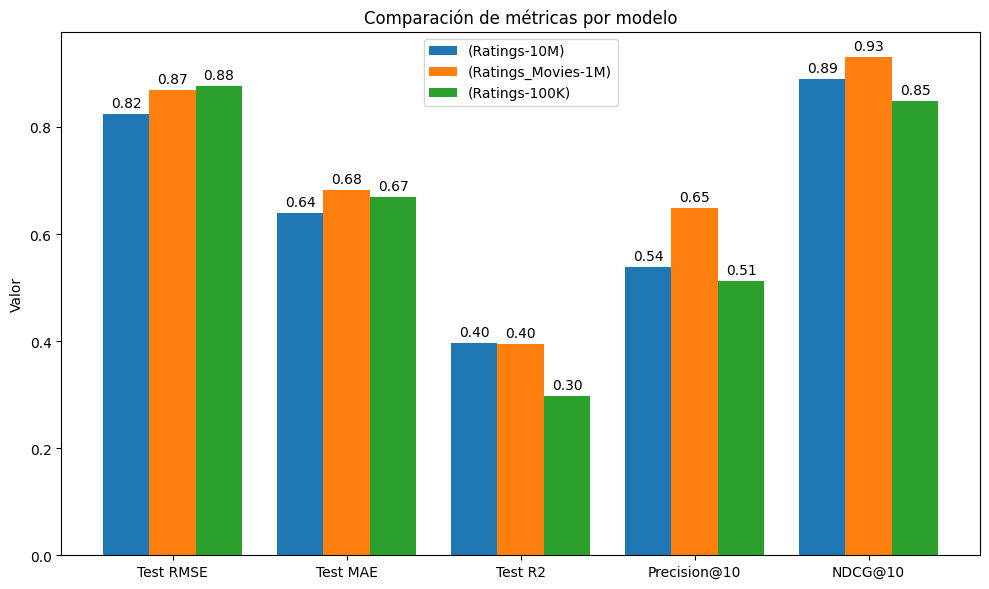

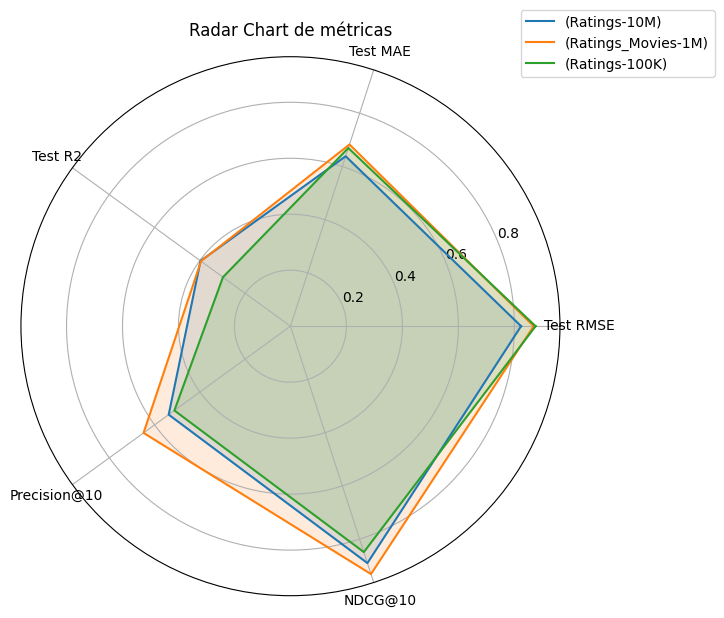

,Model,Test RMSE,Test MAE,Test R2,Precision@10,NDCG@10,Eval Time (s),Epochs,Train Loss,Val Loss,Total Training Time (s)
0,(Ratings-10M),0.824,0.638,0.397,0.538,0.890,12.367,NaN,NaN,NaN,NaN
1,(Ratings_Movies-1M),0.869,0.683,0.395,0.649,0.931,1.736,NaN,NaN,NaN,NaN
2,(Ratings-100K),0.876,0.669,0.298,0.512,0.849,NaN,NaN,NaN,NaN,NaN


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Supongamos que ya tienes el DataFrame cargado
# metrics_df = pd.read_csv('tu_archivo.csv')

# Filtramos los modelos que quieres comparar
models_1m = ['(Ratings-100K)', '(Ratings_Movies-1M)', '(Ratings-10M)']
df = metrics_df[metrics_df['Model'].isin(models_1m)].reset_index(drop=True)

# Métricas a comparar
metrics = ['Test RMSE', 'Test MAE', 'Test R2', 'Precision@10', 'NDCG@10']
x = np.arange(len(metrics))  # posiciones en eje x
n_models = len(df)
width = 0.8 / n_models  # ancho adaptado

# ----------------------------------------
# 1. Gráfico de barras agrupadas
# ----------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

for i, row in df.iterrows():
    offset = (i - n_models/2) * width + width/2
    rects = ax.bar(x + offset, row[metrics], width, label=row['Model'])
    for j, val in enumerate(row[metrics]):
        ax.annotate(f'{val:.2f}',
                    xy=(x[j] + offset, val),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.set_ylabel('Valor')
ax.set_title('Comparación de métricas por modelo')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.show()

# ----------------------------------------
# 2. Radar chart con múltiples modelos
# ----------------------------------------
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars + 1, endpoint=True)

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

for i, row in df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # cerrar la figura
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title('Radar Chart de métricas')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# ----------------------------------------
# 3. Mostrar la tabla como DataFrame
# ----------------------------------------
df.round(3)  # ← Esto se mostrará automáticamente en Jupyter